In [7]:

from torch.utils.data import DataLoader,random_split
from torchvision import transforms,datasets
import torch


transform=transforms.ToTensor()
train_set=datasets.MNIST(root="root",train=True,transform=transform,target_transform=None,download=True)
test_set=datasets.MNIST(root="root",train=False,transform=transform,target_transform=None,download=True)

#Split train dataset into train/validation
train_size=int(0.8 *len(train_set))
val_size=len(train_set)-train_size
train_set,val_set=random_split(train_set,[train_size,val_size])

train_loader=DataLoader(train_set,batch_size=64,shuffle=True)
test_loader=DataLoader(test_set,batch_size=64,shuffle=True)
val_loader=DataLoader(val_set,batch_size=64,shuffle=False)

#check
imgs,labels=next(iter(train_loader))
print(f"Batch shape: {imgs.shape}")  
print(f"Labels shape: {labels.shape}")                







Batch shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])


In [9]:
#feedforward
import torch.nn as nn
class FeedforwardNN(nn.Module):
     def __init__(self):
        super(FeedforwardNN, self).__init__()
        self.flatten=nn.Flatten()

        self.layers = nn.Sequential(
          nn.Linear(28*28, 256),   # Input → Hidden1
          nn.ReLU(),
          nn.Linear(256, 128),     # Hidden1 → Hidden2
          nn.ReLU(),
          nn.Linear(128, 10) )

     def forward(self, x):
        x = self.flatten(x)
        logits = self.layers(x)
        return logits        
    

In [31]:
train_losses = []
train_accs = []
val_losses = []
val_accs = []

for epoch in range(5):
    # ---- Training ----
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)

    # ---- Validation ----
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.view(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch [{epoch+1}/{5}] "
          f"Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}% "
          f"| Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")


Epoch [1/5] Train Loss: 0.1001, Train Acc: 97.37% | Val Loss: 0.2028, Val Acc: 95.37%
Epoch [2/5] Train Loss: 0.0927, Train Acc: 97.57% | Val Loss: 0.1780, Val Acc: 96.13%
Epoch [3/5] Train Loss: 0.0872, Train Acc: 97.74% | Val Loss: 0.1720, Val Acc: 96.19%
Epoch [4/5] Train Loss: 0.0814, Train Acc: 97.92% | Val Loss: 0.1684, Val Acc: 96.79%
Epoch [5/5] Train Loss: 0.0715, Train Acc: 98.13% | Val Loss: 0.2022, Val Acc: 96.50%


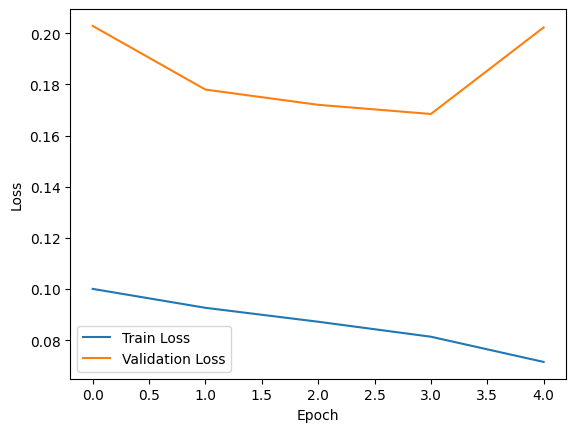

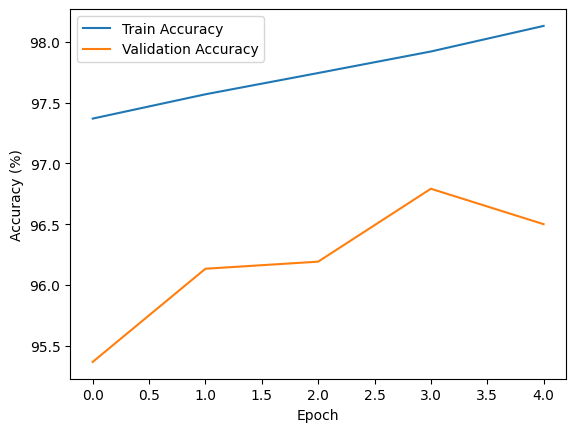

In [32]:
import matplotlib.pyplot as plt
# Loss curve
plt.plot(train_losses, label='Train Loss')   # not epoch_losses
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy curve
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


100.0%
100.0%
100.0%
100.0%


Epoch [1/5], Train Loss: 0.1804, Train Acc: 94.61%, Val Loss: 0.0565, Val Acc: 98.15%
Epoch [2/5], Train Loss: 0.0503, Train Acc: 98.46%, Val Loss: 0.0348, Val Acc: 98.92%
Epoch [3/5], Train Loss: 0.0353, Train Acc: 98.87%, Val Loss: 0.0312, Val Acc: 98.95%
Epoch [4/5], Train Loss: 0.0267, Train Acc: 99.16%, Val Loss: 0.0321, Val Acc: 98.87%
Epoch [5/5], Train Loss: 0.0195, Train Acc: 99.37%, Val Loss: 0.0321, Val Acc: 98.93%


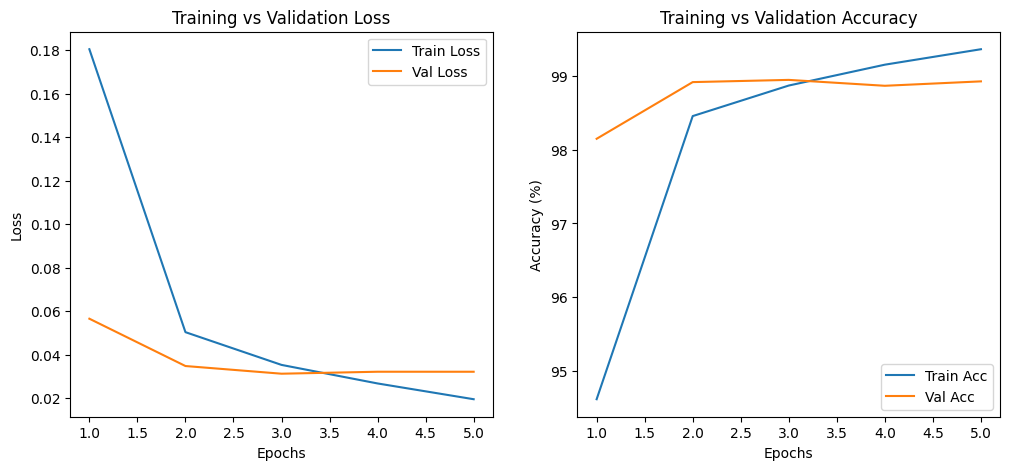

In [34]:
#with cnn
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


# ---------------------------
# 1. Data Preprocessing
# ---------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# ---------------------------
# 2. Define CNN Model
# ---------------------------
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))       # [B, 16, 28, 28]
        x = F.max_pool2d(x, 2, 2)       # [B, 16, 14, 14]
        x = F.relu(self.conv2(x))       # [B, 32, 14, 14]
        x = F.max_pool2d(x, 2, 2)       # [B, 32, 7, 7]
        x = x.view(-1, 32 * 7 * 7)      # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# ---------------------------
# 3. Training Setup
# ---------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ---------------------------
# 4. Training Loop with history
# ---------------------------
num_epochs = 5
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    train_losses.append(train_loss / len(train_loader))
    train_accs.append(train_acc)

    # Validation
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_acc = 100 * correct / total
    val_losses.append(val_loss / len(test_loader))
    val_accs.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_acc:.2f}%, "
          f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_acc:.2f}%")

# ---------------------------
# 5. Plotting
# ---------------------------
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1,2,1)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, val_losses, label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

# Accuracy curve
plt.subplot(1,2,2)
plt.plot(epochs, train_accs, label="Train Acc")
plt.plot(epochs, val_accs, label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.show()
